In [10]:
# General libraries
import pandas as pd
import numpy as np

# Graphic libraries
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

# Scikit Learn libraries
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor

# **Load Dataset**

* Rosetta features description: https://www.rosettacommons.org/docs/latest/rosetta_basics/scoring/score-types





In [11]:
folder_path = "../data/"
df_solubility = pd.read_csv(folder_path + "complex_raw_data.csv")

In [12]:
df_solubility.head()

,SCORE:,total_score,score,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,...,omega,overlap_chainbreak,p_aa_pp,pro_close,rama_prepro,ref,time,yhh_planarity,description,solubility
0,SCORE:,-470.914,-470.914,0.000,-1203.414,338.522,-341.858,2.604,46.000,129.335,...,11.135,0.0,-34.513,0.769,7.706,60.218,1.0,0.108,pdb1a0f.ent_A_0001_0001,77
1,SCORE:,-619.930,-619.930,0.000,-1890.675,497.641,-474.868,3.522,61.099,236.580,...,18.094,0.0,-48.935,4.452,21.634,147.414,1.0,0.158,pdb1a5t.ent_A_0001_0001,38
2,SCORE:,-265.255,-265.255,0.000,-835.965,263.453,-240.659,1.869,35.778,110.637,...,5.542,0.0,-22.884,0.475,-1.901,54.992,0.0,0.023,pdb1a6j.ent_A_0001_0001,83
3,SCORE:,-844.622,-844.622,-0.844,-2087.197,547.917,-575.513,4.085,69.996,265.698,...,11.092,0.0,-68.061,2.464,-4.538,88.832,0.0,1.059,pdb1a99.ent_A_0001_0001,62
4,SCORE:,-830.058,-830.058,0.000,-1848.881,425.681,-545.863,3.959,58.497,194.939,...,7.321,0.0,-43.925,3.180,12.627,91.631,0.0,0.289,pdb1abe.ent_A_0001_0001,87


# Preprocessing

In [13]:
# Check if there is any missing value.
# Must return 0.
df_solubility.isna().sum().sum()

0

In [14]:
df_solubility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SCORE:               405 non-null    object 
 1   total_score          405 non-null    float64
 2   score                405 non-null    float64
 3   dslf_fa13            405 non-null    float64
 4   fa_atr               405 non-null    float64
 5   fa_dun               405 non-null    float64
 6   fa_elec              405 non-null    float64
 7   fa_intra_rep         405 non-null    float64
 8   fa_intra_sol_xover4  405 non-null    float64
 9   fa_rep               405 non-null    float64
 10  fa_sol               405 non-null    float64
 11  hbond_bb_sc          405 non-null    float64
 12  hbond_lr_bb          405 non-null    float64
 13  hbond_sc             405 non-null    float64
 14  hbond_sr_bb          405 non-null    float64
 15  linear_chainbreak    405 non-null    flo

In [15]:
# Are all columns with significant value?
df_solubility.describe()

,total_score,score,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,...,lk_ball_wtd,omega,overlap_chainbreak,p_aa_pp,pro_close,rama_prepro,ref,time,yhh_planarity,solubility
count,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,...,405.000000,405.000000,405.0,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000,405.000000
mean,-660.909341,-660.909343,-0.031175,-1662.169333,417.837035,-461.458563,3.185533,56.908037,195.155232,997.474953,...,-40.763867,26.701625,0.0,-52.729393,2.034030,8.808395,97.757899,0.059259,0.205395,59.419753
std,372.176345,372.176338,0.409363,881.899785,227.145880,245.769657,1.628280,29.314179,116.803439,538.269300,...,21.969469,26.211415,0.0,26.769766,2.438288,20.412649,52.213834,0.236401,0.242374,32.366429
min,-2145.657000,-2145.657000,-5.404000,-5693.017000,58.140000,-1609.998000,0.500000,7.690000,13.187000,98.422000,...,-140.635000,0.406000,0.0,-189.837000,0.056000,-40.344000,0.160000,0.000000,0.000000,2.000000
25%,-888.386000,-888.386000,0.000000,-2136.624000,256.230000,-601.431000,2.001000,34.343000,109.714000,574.828000,...,-51.688000,8.171000,0.0,-66.829000,0.886000,-5.907000,57.928000,0.000000,0.037000,30.000000
50%,-621.309000,-621.309000,0.000000,-1581.975000,374.421000,-432.050000,2.933000,53.377000,175.765000,922.336000,...,-38.137000,18.850000,0.0,-49.317000,1.513000,6.711000,92.886000,0.000000,0.125000,64.000000
75%,-392.645000,-392.645000,0.000000,-965.458000,518.917000,-268.588000,4.032000,70.347000,250.788000,1288.549000,...,-23.972000,35.629000,0.0,-33.371000,2.458000,20.826000,128.078000,0.000000,0.266000,86.000000
max,108.085000,108.085000,4.902000,-152.808000,1496.329000,-34.770000,10.779000,204.734000,787.426000,3498.846000,...,-4.531000,167.643000,0.0,-5.532000,24.243000,108.660000,288.724000,1.000000,1.904000,133.000000


In [16]:
df_solubility['description'].describe()

count                         405
unique                        405
top       pdb1a0f.ent_A_0001_0001
freq                            1
Name: description, dtype: object

In [17]:
# Remove 'yhh_planarity', 'overlap_chainbreak' and 'linear_chainbreak' because are constants / only have 1 value.
df_solubility.drop(columns=[
    'yhh_planarity', 
    'overlap_chainbreak', 
    'linear_chainbreak',
    'SCORE:'], 
    axis=1, inplace=True)


# Remove description because each row have a diferent value. Basicaly an index.
df_solubility.drop(columns=['description'], axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

## Distribution

array([[<AxesSubplot:title={'center':'total_score'}>,
        <AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'dslf_fa13'}>,
        <AxesSubplot:title={'center':'fa_atr'}>,
        <AxesSubplot:title={'center':'fa_dun'}>],
       [<AxesSubplot:title={'center':'fa_elec'}>,
        <AxesSubplot:title={'center':'fa_intra_rep'}>,
        <AxesSubplot:title={'center':'fa_intra_sol_xover4'}>,
        <AxesSubplot:title={'center':'fa_rep'}>,
        <AxesSubplot:title={'center':'fa_sol'}>],
       [<AxesSubplot:title={'center':'hbond_bb_sc'}>,
        <AxesSubplot:title={'center':'hbond_lr_bb'}>,
        <AxesSubplot:title={'center':'hbond_sc'}>,
        <AxesSubplot:title={'center':'hbond_sr_bb'}>,
        <AxesSubplot:title={'center':'lk_ball_wtd'}>],
       [<AxesSubplot:title={'center':'omega'}>,
        <AxesSubplot:title={'center':'p_aa_pp'}>,
        <AxesSubplot:title={'center':'pro_close'}>,
        <AxesSubplot:title={'center':'rama_prepro'}>,
        <

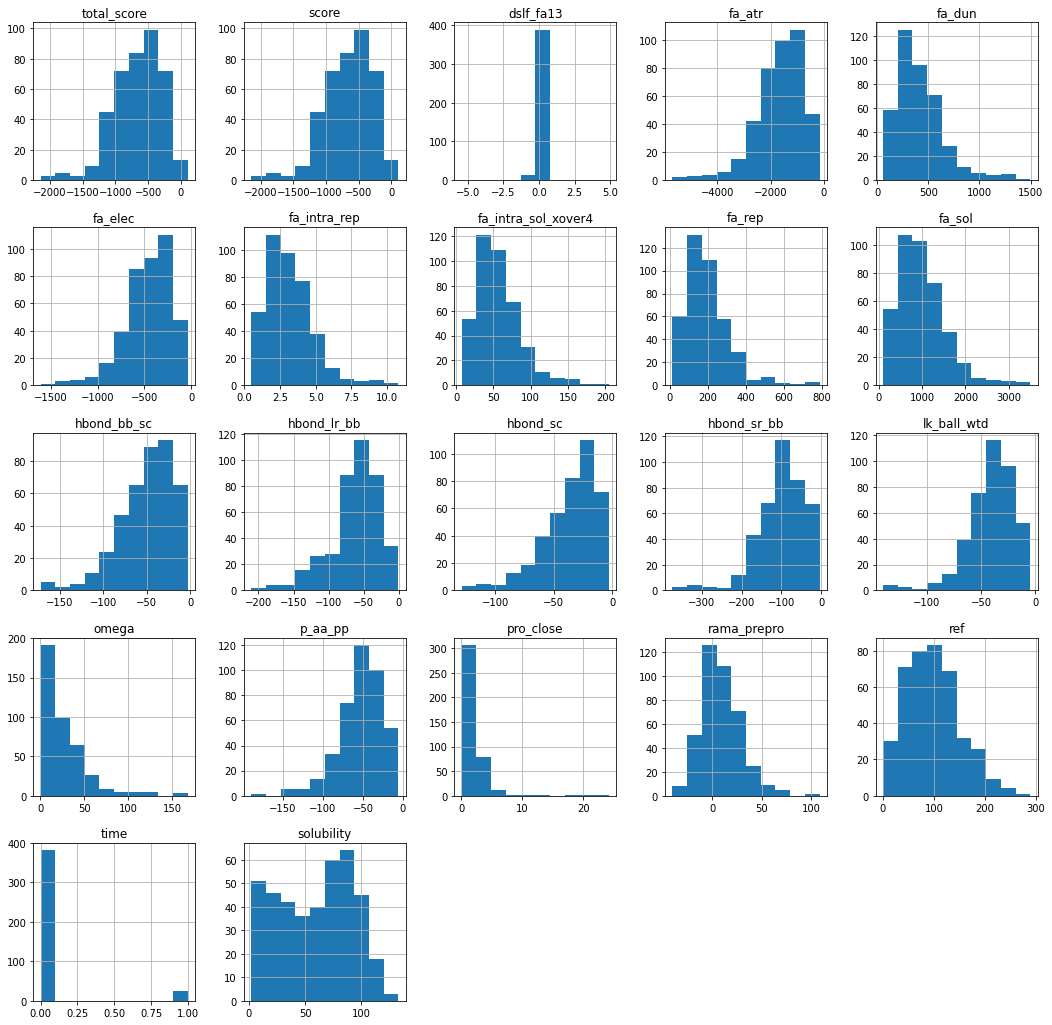

In [18]:
df_solubility.hist(figsize=(18, 18))

array([[<AxesSubplot:title={'center':'total_score'}>,
        <AxesSubplot:title={'center':'score'}>,
        <AxesSubplot:title={'center':'dslf_fa13'}>,
        <AxesSubplot:title={'center':'fa_atr'}>,
        <AxesSubplot:title={'center':'fa_dun'}>],
       [<AxesSubplot:title={'center':'fa_elec'}>,
        <AxesSubplot:title={'center':'fa_intra_rep'}>,
        <AxesSubplot:title={'center':'fa_intra_sol_xover4'}>,
        <AxesSubplot:title={'center':'fa_rep'}>,
        <AxesSubplot:title={'center':'fa_sol'}>],
       [<AxesSubplot:title={'center':'hbond_bb_sc'}>,
        <AxesSubplot:title={'center':'hbond_lr_bb'}>,
        <AxesSubplot:title={'center':'hbond_sc'}>,
        <AxesSubplot:title={'center':'hbond_sr_bb'}>,
        <AxesSubplot:title={'center':'lk_ball_wtd'}>],
       [<AxesSubplot:title={'center':'omega'}>,
        <AxesSubplot:title={'center':'p_aa_pp'}>,
        <AxesSubplot:title={'center':'pro_close'}>,
        <AxesSubplot:title={'center':'rama_prepro'}>,
        <

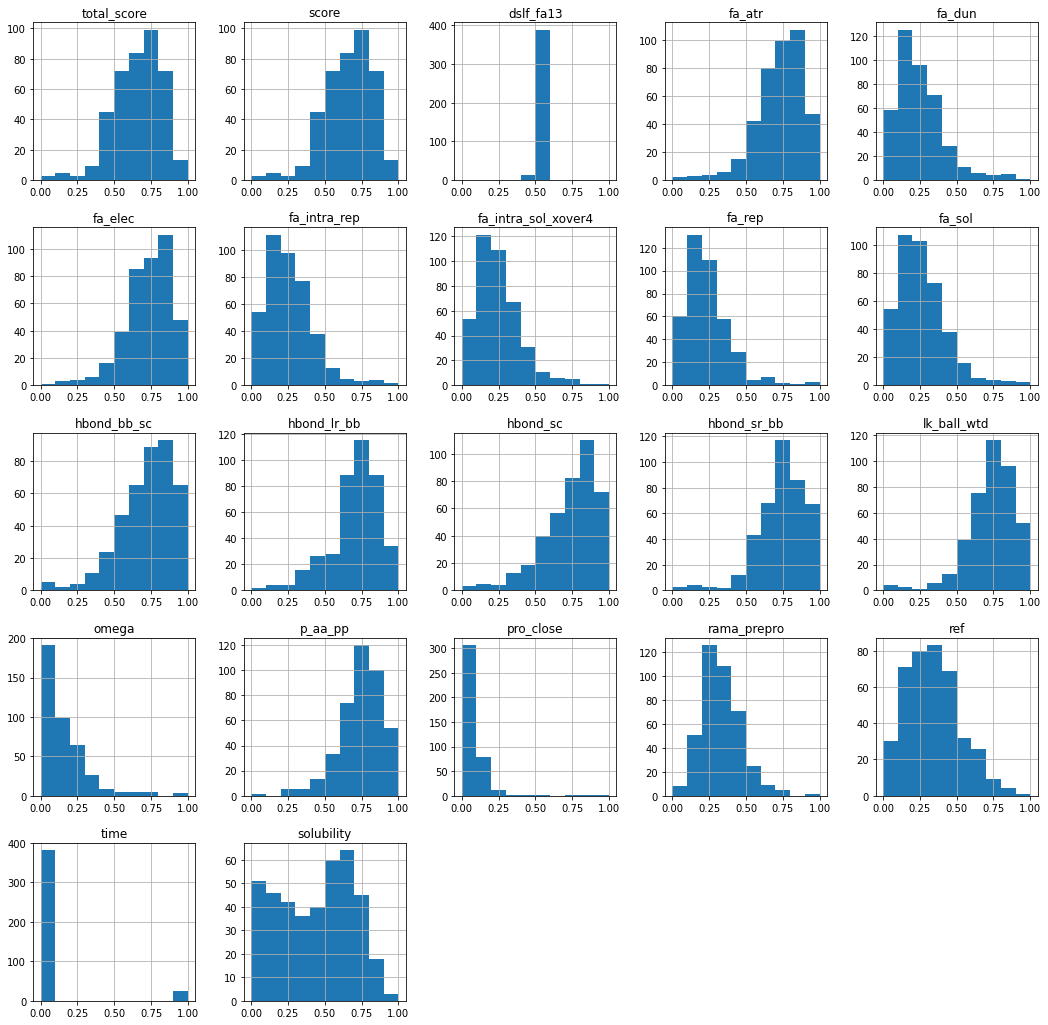

In [19]:
# Data Standardization/Escalation
# Create stantardized dataset

df_scaler = df_solubility.copy()

scaler = MinMaxScaler()

df_new = scaler.fit_transform(df_scaler)

cols = df_scaler.columns

df_solubility_standardized = pd.DataFrame(df_new, columns =df_solubility.columns)

df_solubility_standardized.hist(figsize=(18, 18))

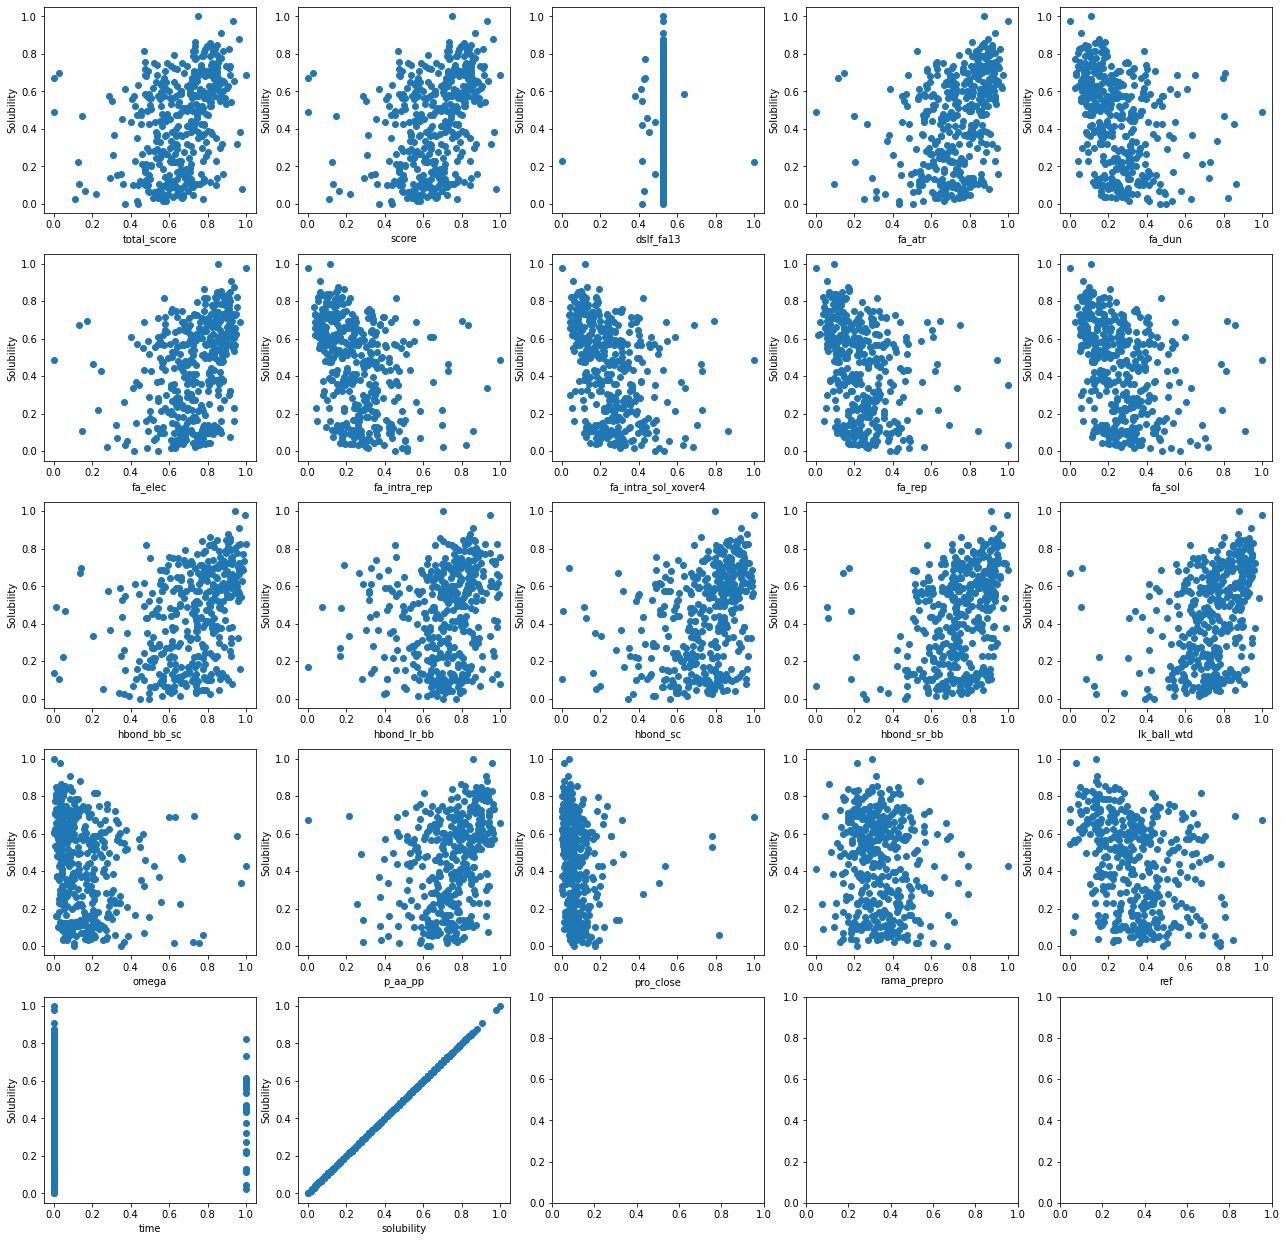

In [20]:
# Scatter plot to check linearity between the dependent variables with the dependent (solubility)
# Must be a standardized dataset

fig, axs = plt.subplots(5, 5, figsize=(22,22))

features = list(df_solubility_standardized.columns)

for row_position in range(0,5):
    
    for column_position in range(0,5):
        
        if features == []:
            break

        axs[row_position, column_position].scatter(df_solubility_standardized[features[0]], df_solubility_standardized.solubility)
        axs[row_position, column_position].set_xlabel(features[0])
        axs[row_position, column_position].set_ylabel("Solubility")

        features.pop(0)

plt.show()


# Correlation

In [21]:
# Create Pearson Correlation dataset between all features

pearson_corr = df_solubility_standardized.corr()

pearson_corr.head()

,total_score,score,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,...,hbond_sc,hbond_sr_bb,lk_ball_wtd,omega,p_aa_pp,pro_close,rama_prepro,ref,time,solubility
total_score,1.000000,1.000000,0.039411,0.925450,-0.792867,0.935991,-0.839418,-0.884840,-0.759855,-0.911834,...,0.887296,0.831711,0.897994,-0.431019,0.905736,-0.255680,-0.086335,-0.778723,-0.121707,0.366882
score,1.000000,1.000000,0.039411,0.925450,-0.792866,0.935991,-0.839418,-0.884840,-0.759855,-0.911834,...,0.887296,0.831711,0.897994,-0.431019,0.905736,-0.255680,-0.086335,-0.778723,-0.121707,0.366882
dslf_fa13,0.039411,0.039411,1.000000,0.019448,-0.002644,0.023593,0.003342,-0.020390,-0.008781,-0.027149,...,0.021158,0.032788,0.028901,0.035914,0.015576,0.021936,0.049382,0.037739,0.019137,0.005340
fa_atr,0.925450,0.925450,0.019448,1.000000,-0.958008,0.993454,-0.971094,-0.985594,-0.928176,-0.996069,...,0.914595,0.897236,0.963268,-0.568223,0.931661,-0.444788,-0.292721,-0.814838,-0.128646,0.366244
fa_dun,-0.792867,-0.792866,-0.002644,-0.958008,1.000000,-0.945661,0.974708,0.973175,0.946486,0.961690,...,-0.866814,-0.840671,-0.916237,0.592816,-0.874564,0.525734,0.377545,0.727423,0.124935,-0.322162


In [22]:
# Heatmap of pearson correlation matrix

data = [go.Heatmap( z=pearson_corr.values, x=list(pearson_corr.columns), y=list(pearson_corr.index), colorscale='Portland')]
iplot(data, filename='pandas-heatmap')

# Anomaly Detection (outliers)

Two models were used:
* Isolation Forest;
* Local Outlier Factor (LOF).

## Isolation Forest (IF)

Some links to better understand the topic:
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html

In [23]:
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.1),random_state=42)
df = df_solubility_standardized.copy().drop(columns=['solubility'])
model.fit(df)

/Users/renan/Library/Python/3.7/lib/python/site-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.1, random_state=42)

In [24]:
anomaly_score = model.predict(df)
scores = model.decision_function(df)

df['IF_anomaly_score'] = anomaly_score
df['IF_scores'] = scores
df[df['IF_anomaly_score']==-1][['IF_scores']].sort_values(by=['IF_scores'])

,IF_scores
139,-0.262140
109,-0.221900
345,-0.216931
237,-0.209554
225,-0.201398
317,-0.194761
269,-0.191566
262,-0.181686
323,-0.174544
276,-0.159383


## Local Outlier Factor (LOF)

Some links to better understand the topic:
* https://towardsdatascience.com/anomaly-detection-with-local-outlier-factor-lof-d91e41df10f2
* https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html

In [25]:
# Model specification
model_LOF = LocalOutlierFactor(n_neighbors = 2, metric = "manhattan", contamination = 0.1)

# Model fitting
lof_y_pred = model_LOF.fit_predict(df_solubility_standardized.copy().drop(columns=['solubility']))
#lof_scores = model_LOF.decision_function(df)

In [26]:
df['LOF_y_pred'] = lof_y_pred

df.head()

,total_score,score,dslf_fa13,fa_atr,fa_dun,fa_elec,fa_intra_rep,fa_intra_sol_xover4,fa_rep,fa_sol,...,lk_ball_wtd,omega,p_aa_pp,pro_close,rama_prepro,ref,time,IF_anomaly_score,IF_scores,LOF_y_pred
0,0.743094,0.743094,0.524355,0.810367,0.194955,0.805052,0.204689,0.194424,0.150016,0.181959,...,0.814943,0.064154,0.842755,0.029479,0.322475,0.208127,1.0,1,0.044866,1
1,0.676975,0.676975,0.524355,0.686317,0.305593,0.720613,0.293997,0.271051,0.288532,0.295748,...,0.680818,0.105766,0.764504,0.181751,0.415949,0.510299,1.0,1,0.039506,1
2,0.834347,0.834347,0.524355,0.876691,0.142758,0.869296,0.133184,0.142547,0.125866,0.120619,...,0.858072,0.030711,0.905852,0.017323,0.258000,0.190017,0.0,1,0.093500,1
3,0.577278,0.577278,0.442461,0.650845,0.340551,0.656721,0.348769,0.316203,0.326141,0.338899,...,0.635345,0.063897,0.660731,0.099558,0.240302,0.307287,0.0,1,0.068802,1
4,0.583740,0.583740,0.524355,0.693861,0.255558,0.675543,0.336511,0.257846,0.234749,0.303265,...,0.687100,0.041349,0.791688,0.129160,0.355501,0.316987,0.0,1,0.093454,1


## Compare Isolation forest VS LOF predictions

In [27]:
lof_predictions = df.index[df['LOF_y_pred'] == -1].tolist()
print(lof_predictions)

[8, 9, 12, 18, 29, 40, 63, 72, 76, 77, 83, 92, 94, 107, 108, 144, 147, 154, 163, 168, 186, 191, 210, 225, 240, 244, 251, 265, 276, 284, 295, 304, 306, 317, 318, 320, 326, 351, 362, 384, 396]


In [28]:
if_predictions = df.index[df['IF_anomaly_score'] == -1].tolist()
print(if_predictions)

[15, 18, 45, 57, 72, 74, 109, 129, 139, 144, 146, 154, 170, 185, 197, 210, 225, 232, 237, 239, 240, 242, 246, 252, 254, 262, 266, 269, 276, 284, 297, 306, 317, 323, 326, 334, 337, 345, 361, 393, 396]


In [29]:
if_lof_match_values = []

for i in lof_predictions:
    if i in if_predictions:
        if_lof_match_values.append(i)

print(if_lof_match_values)

[18, 72, 144, 154, 210, 225, 240, 276, 284, 306, 317, 326, 396]


In [30]:
print(len(if_predictions))
print(len(lof_predictions))

print(len(if_lof_match_values))

41
41
13


## Compare IF and LOF matching values with strange values from histogram

In [31]:
# 'pro_close' column seemed to have some distant values (possible outliers)
# Verify how many values are above 0.5 (use standardized dataset)

filtered = df_solubility_standardized.query("pro_close >= 0.5")
print('Number of indexes above estimated \'pro_close\' value: {}'.format(filtered.shape[0]))

# Compare filtered pro_close list with the IF and LOF matching predictions
filtered_list = filtered.index.tolist()
intersection = set(filtered_list).intersection(if_lof_match_values)
print(intersection)

Number of indexes above estimated 'pro_close' value: 6
{326, 240, 18, 306, 317}


## Create dataset without possible outliers

In [32]:
# Remove indexes that matched from the IF_LOF predictions and the 'pro_close' feature above 0.5

df_solubility_removed_possible_outliers = df_solubility_standardized.copy()
print(df_solubility_removed_possible_outliers.shape[0])
df_solubility_removed_possible_outliers.drop(index=intersection, inplace=True)
print(df_solubility_removed_possible_outliers.shape[0])

405
400


# Create Treated Data .CSV

In [33]:
df_solubility.to_csv(folder_path + 'complex_processed_data.csv', index=False)
df_solubility_standardized.to_csv(folder_path + 'complex_processed_standardized_data.csv', index=False)
df_solubility_removed_possible_outliers.to_csv(folder_path + 'complex_processed_standardized_outliers_removed_data.csv', index=False)

# Conclusions / Overview

* No NA values;
* Only working with float64 values;
* Target ranges from 2 to 133;
* Removed 'yhh_planarity', 'overlap_chainbreak' and 'linear_chainbreak' because are constants / only have 1 value;
* Removed 'description' because each row have a diferent value. Basicaly an index;
* Plotted histograms with raw and standardized values to check data distribution (no anomalies detected);
* Plotted scatter plot to check the if the relation between the X and Y variables are linear;
* Created a dataset and Plotted a heatmap to check the pearson correlation between features;
* Applied Isolation Forest and Local Outlier Factor to verify outliers (used standadized dataset) (compared the results from the 2 models and 14/41 values matched);
* Verified how many indexes are equal or above 0.5 for 'pro_close' column on an stardadized dataset. 6 values were found.
* Compared the indexes from the IF_LOF predictions with the pro_close results. 5 values matched.
* Generated 3 .csv files: one without stardadization other with standardization and another with standardization and possible outliers indexes removed.